# Introduction:

**Problem Statement:**

Suppose you are a data scientist working for a bank that recently conducted a marketing campaign to promote term deposits to its clients. The bank collected data on various client characteristics, such as age, job type, marital status, education level, and more. Your task is to analyze this dataset and build a machine learning model to predict whether a client will subscribe to a term deposit or not.

<center><img src="https://img.etimg.com/thumb/width-420,height-315,imgsize-51456,resizemode-75,msid-110798763/markets/stocks/news/will-short-term-narrative-headwinds-for-psu-banks-bring-back-mojo-to-private-sector-banks-5-banks-with-an-upside-potential-of-up-to-24/bankk.jpg"/></center>

By accurately predicting client subscription behavior, your model will enable the bank to optimize its marketing efforts. It will help identify potential clients who are more likely to subscribe to the term deposit, allowing the bank to focus its resources on targeting these individuals. This targeted approach will not only increase the effectiveness of the marketing campaign but also maximize the bank's return on investment.

# STEP 1: Import the necessary Libraries

In [ ]:
# Import the necessary libraries
# Data manipulation and numerical operationsimport pandas as pd
import numpy as np
import pandas as pd
import os
from google.colab import drive, files
# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning model metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Setting maximum limit of the number of columns visible
pd.set_option('display.max_columns', 30)

# STEP 2: Loading the Data

**Dataset Information:**
Content: Each row represents a customer, and each column contains attributes related to the customer's socio-economic background, bank contact information, and the outcome of a marketing campaign.

The dataset includes information about:

- **Demographic Information:** Age, job type, marital status, education level, whether the customer has a loan or housing loan, and whether they have defaulted on a loan.

- **Bank Contact Information:** The method of contact (cellular, telephone), last contact month, last contact day of the week, duration of the last contact, and number of contacts performed during this campaign.

- **Socio-Economic Indicators:** Employment variation rate, consumer price index, consumer confidence index, Euribor 3-month rate, and the number of employees.

- **Campaign Outcome:** Whether the client has subscribed to a term deposit (the column is called y).

### 2.1 Load the data & view it

*Hint: Use `;` as the delimiter.*

In [ ]:
drive.mount("/content/drive")
os.listdir('/content/drive/MyDrive/AIML/BANK_CLASS/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['bank_data.csv']

In [ ]:
# Loading the data
# Read the csv file
# os.listdir('/content/drive/MyDrive/AIML/BANK_CLASS/')

os.chdir('/content/drive/MyDrive/AIML/BANK_CLASS/')
df = pd.read_csv('bank_data.csv', sep=';')
# df = files.upload()
# Viewing the data


Mounted at /content/drive


### 2.2 View the columns of the data and understand them

In [ ]:
# View the columns of the dataset

print(f"columns: {df.columns[0]}")
df.head()

columns: age


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 2.3 Check the shape of the dataset

In [ ]:
# Checking the shape of the data
df.shape

(41188, 21)

### 2.4 Understand the datatypes of each of the columns

In [ ]:
# Check the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# STEP 3: EDA

### 3.1 Check the distribution of the target variable - `y`.

In [ ]:
# Checking the distribution of the target variable 'y'
print("Target variable (y) values:")
print(df['y'].value_counts())
print(df['y'].value_counts(normalize=True) * 100)


Target variable (y) values:
y
no     36548
yes     4640
Name: count, dtype: int64
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

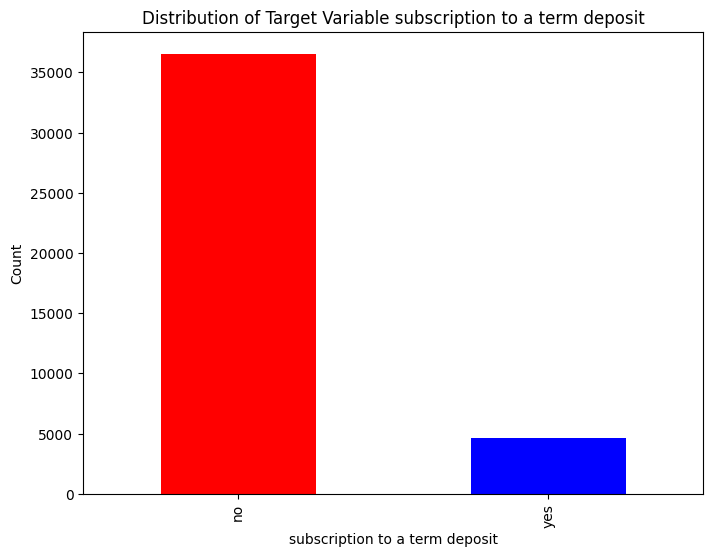

In [ ]:
# Set the figure size for better readability
# Create a count plot for the 'y' variable in the dataset
# Add a title to the plot
# Label the x-axis
# Label the y-axis
# Display the plot
df['y'].value_counts().plot(kind="bar", figsize=(8, 6), color=['red', 'blue'] )
plt.title("Distribution of Target Variable subscription to a term deposit")
plt.xlabel("subscription to a term deposit")
plt.ylabel("Count")
plt.show


### 3.2 Do an analysis of the `Subscription Rate` variable wrt all the categorical variables

*Hint: Use normalized values to plot to avoid the class imbalance problem.*

In [ ]:
# Listing all the categorical columns
cat_df = df.select_dtypes(['object'])

cat_df = cat_df.drop('y', axis=1)

def subscription_rate(df, col):
  return pd.crosstab(df[col], df['y'], normalize='index') * 100
for col in cat_df.columns:
  print(f"col name: {col}, numer of datatype: {df[col].nunique()}")
  sub_rate = subscription_rate(df, col)
  print(f"\nSubscription rate by {col}:")
  print(round(sub_rate, 2))


col name: job, numer of datatype: 12

Subscription rate by job:
y                 no    yes
job                        
admin.         87.03  12.97
blue-collar    93.11   6.89
entrepreneur   91.48   8.52
housemaid      90.00  10.00
management     88.78  11.22
retired        74.77  25.23
self-employed  89.51  10.49
services       91.86   8.14
student        68.57  31.43
technician     89.17  10.83
unemployed     85.80  14.20
unknown        88.79  11.21
col name: marital, numer of datatype: 4

Subscription rate by marital:
y            no    yes
marital               
divorced  89.68  10.32
married   89.84  10.16
single    86.00  14.00
unknown   85.00  15.00
col name: education, numer of datatype: 8

Subscription rate by education:
y                       no    yes
education                        
basic.4y             89.75  10.25
basic.6y             91.80   8.20
basic.9y             92.18   7.82
high.school          89.16  10.84
illiterate           77.78  22.22
professional.course  8



1.   Target students and retired people - they subscribe more
2.   March and December are golden months for campaigns
3.   Avoid May campaigns - low success rate
4.   Use cellular contact over telephone
5.   Previous successful customers are goldmine for future campaigns

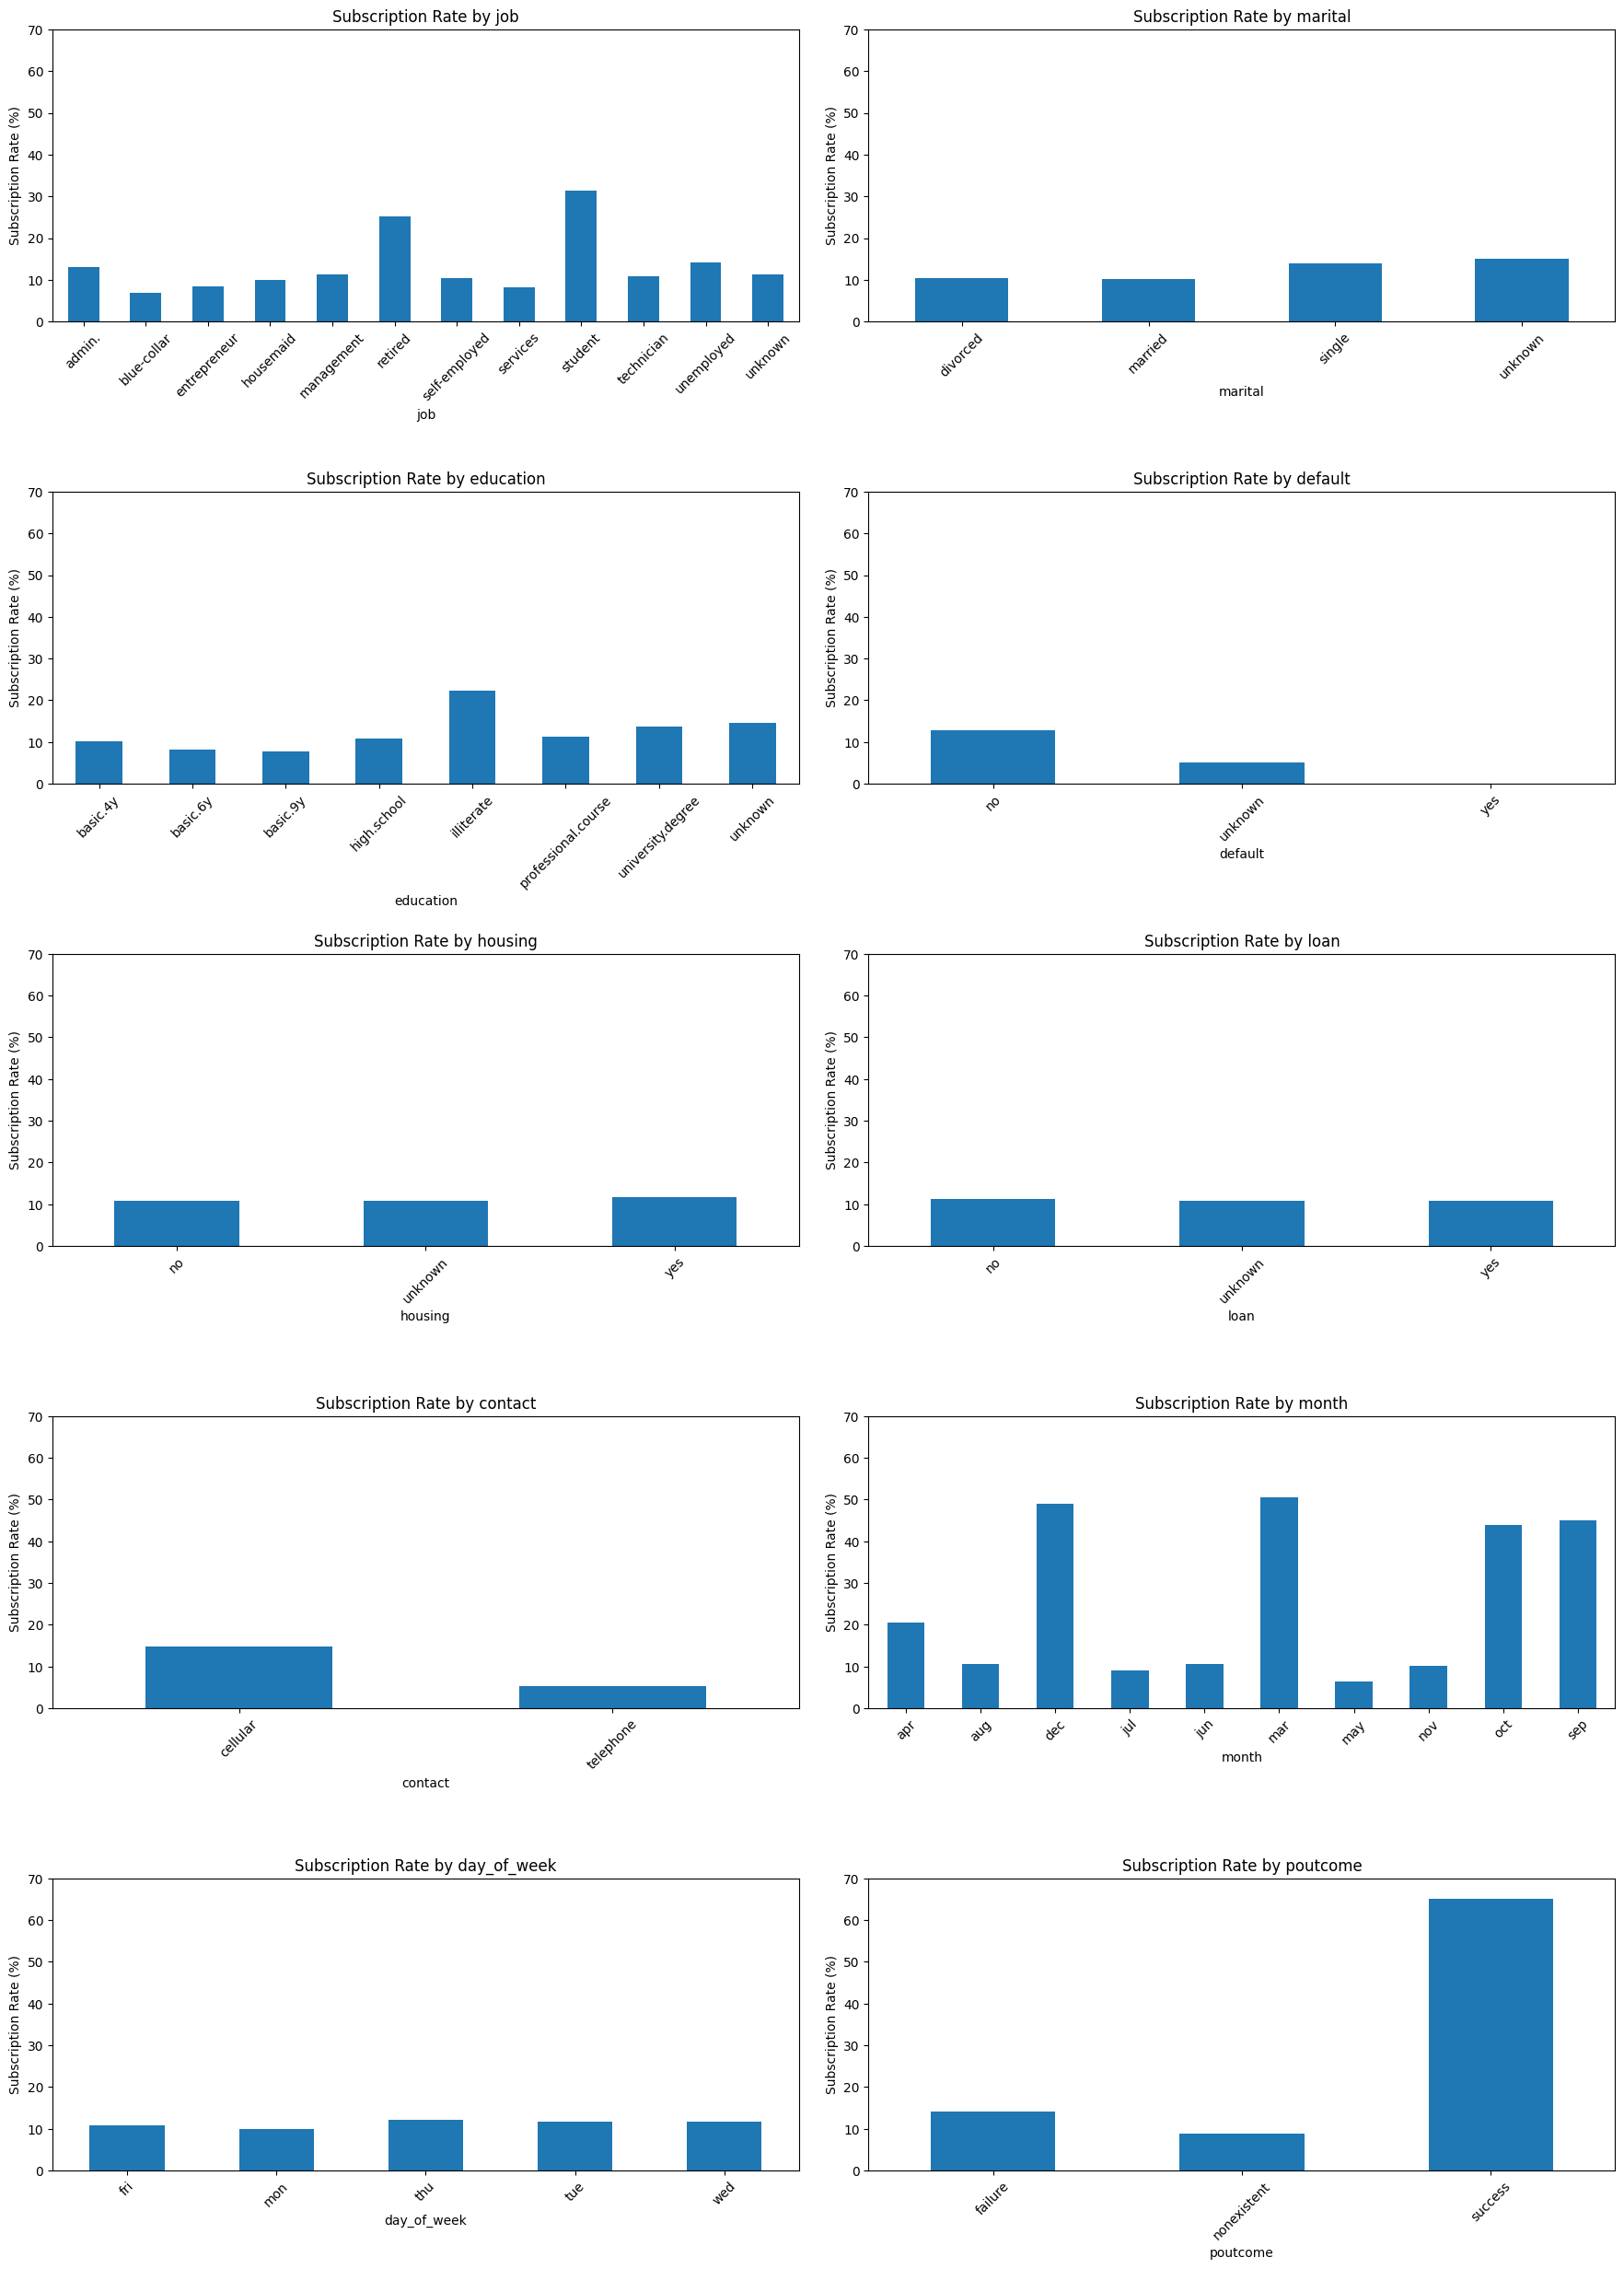

In [ ]:
# Visualize the data
# Setting up the subplot grid
# Plotting each categorical feature in a subplot
    # Plotting the normalized counts as bar plots
    # Setting title and labels
# Adjusting layout
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 25))
y = df['y']
# Makes it easier to iterate through
axes = axes.flatten()
for i, col in enumerate(cat_df.columns):
  subscription_rate(df, col)['yes'].plot(kind='bar', ax=axes[i])
  axes[i].set_title(f'Subscription Rate by {col}')
  axes[i].set_ylim(0, 70)
  axes[i].set_ylabel('Subscription Rate (%)')
  axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout(pad=2.0)
plt.show()

# STEP 4: Feature Engineering

### 4.1 Do a correlation analysis of the data

In [ ]:
#Correlation analysis of the dataset
# Set the figure size to make the heatmap more readable
# Create a heatmap to visualize the correlation matrix of the numeric features in the datase
# Display the heatmap
num_df = df.select_dtypes(['int64', 'float64'])
num_list = num_df.columns
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp.var.rate    41188 non-null  float64
 6   cons.price.idx  41188 non-null  float64
 7   cons.conf.idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr.employed     41188 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 3.1 MB


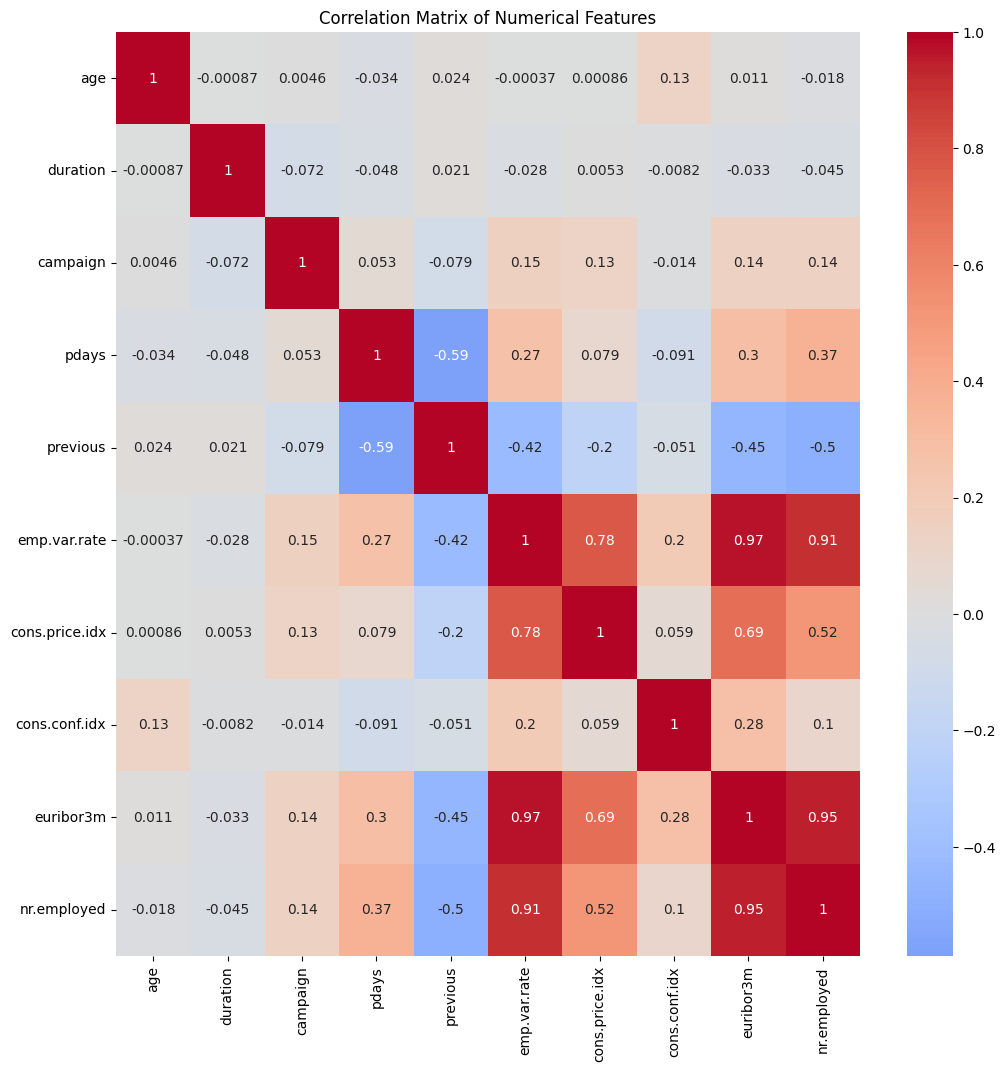

In [ ]:
corr = num_df.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


### 4.2 Plot a heat map for the top 3 highly correlated variables

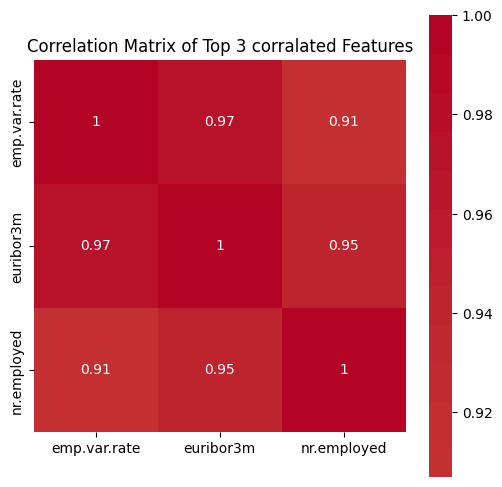

In [ ]:
# Plot the Heat map for the top 3 correlated variables
top_3_corr = ['emp.var.rate', 'euribor3m', 'nr.employed']
df_3_corr = df[top_3_corr]
corr_3 = df_3_corr.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_3, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of Top 3 corralated Features')
plt.show()

# STEP 5: Feature Engineering

### 5.1 Create a new feature `pdays999`

Create a new binary feature `pdays999` that indicates whether the pdays value is 999.

In the context of marketing data, `pdays=999` often represents customers who were not previously contacted. This feature might be more informative than the raw pdays values.

In [ ]:
# Create a binary feature indicating if 'pdays' equals 999, which likely represents customers not previously contacted

df['pdays999'] = df['pdays'] == 999


# View the new feature created
df['pdays999']

,pdays999
0,True
1,True
2,True
3,True
4,True
...,...
41183,True
41184,True
41185,True
41186,True


## 5.2 Drop the original `pdays`column, `euribor3m`, `nr.employed` columns

In [ ]:
# Dropping the original 'pdays' column since it's now represented by 'pdays999'
# Dropping 'euribor3m', 'nr.employed' due to its high multicollinearity with  'emp.var.rate'
f_df = df.drop(['pdays', 'euribor3m', 'nr.employed'], axis=1)
print(f_df.info())
# Display the first few rows of the updated dataframe to verify changes
f_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  y               41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y,pdays999
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,no,True
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,no,True
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,no,True
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,no,True
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,no,True


### 5.3 Add the `pdays999` column to the list of categorical columns already created

In [ ]:
# Append the column `pdays999` to the categorical columns list created already
cat_df = f_df.select_dtypes(['object', 'bool'])
cat_df = cat_df.drop(['y'],axis=1)

# Check the list
cat_df.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'pdays999'],
      dtype='object')

### 5.4 Convert the categorical features to dummies and prepare for modelling

In [ ]:
# Create dummies for categorical variables
cat_n_df = pd.get_dummies(cat_df, drop_first=True)
# Check the data
cat_n_df.head()

,pdays999,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,...,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
2,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False


### 5.5 Check for null values after the dummies creation & handle them if required

In [ ]:
# Checking for null values
data = cat_n_df.copy()
data.isna().sum()

,0
pdays999,0
job_blue-collar,0
job_entrepreneur,0
job_housemaid,0
job_management,0
job_retired,0
job_self-employed,0
job_services,0
job_student,0
job_technician,0


# STEP 6: Model Building

### 6.1 Split the data into train and test

In [ ]:
# Separate the features (X) from the target variable (y)
X = data
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state= 42)

# Splitting the dataset into training and testing sets

# Check the data
print("=== TRAIN-TEST SPLIT CHECK ===")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution:\n{y_train.value_counts(normalize=True)}")
print(f"y_test distribution:\n{y_test.value_counts(normalize=True)}")

=== TRAIN-TEST SPLIT CHECK ===
X_train shape: (32950, 44)
X_test shape: (8238, 44)
y_train distribution:
y
no     0.887557
yes    0.112443
Name: proportion, dtype: float64
y_test distribution:
y
no     0.886502
yes    0.113498
Name: proportion, dtype: float64


### 6.2 Build a Naive Bayes Classifier on the data


In [ ]:
# Import the module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize and train the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
# Predict on the test set
y_pred = nb_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy score: {accuracy:.4f}')
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n')
print(confusion_matrix(y_test, y_pred))

accuracy score: 0.8261

Classification Report:

              precision    recall  f1-score   support

          no       0.93      0.87      0.90      7303
         yes       0.32      0.46      0.38       935

    accuracy                           0.83      8238
   macro avg       0.62      0.67      0.64      8238
weighted avg       0.86      0.83      0.84      8238


Confusion Matrix:

[[6375  928]
 [ 505  430]]


### 6.3 Build a Decision Tree Classifier with 'gini' as the criterion for split


In [ ]:
# Import the library
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier with 'gini' as the criterion

dt_model = DecisionTreeClassifier(criterion='gini', random_state=42)
# Train the classifier on the training data
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print the classification report
print(f'Decision Tree accuracy score: {accuracy_dt:.4f}')
print('\nDecision Tree Classification Report:\n')
print(classification_report(y_test, y_pred_dt))
print('\nDecision Tree Confusion Matrix:\n')
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree accuracy score: 0.8628

Decision Tree Classification Report:

              precision    recall  f1-score   support

          no       0.91      0.94      0.92      7303
         yes       0.35      0.25      0.29       935

    accuracy                           0.86      8238
   macro avg       0.63      0.59      0.61      8238
weighted avg       0.84      0.86      0.85      8238


Decision Tree Confusion Matrix:

[[6877  426]
 [ 704  231]]


### 6.4 Build a Decision Tree Classifier with 'entropy' as the criterion for split




In [ ]:
# Initialize the Decision Tree classifier with 'entropy' as the criterion
dt_en_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the classifier on the training data
dt_en_model.fit(X_train, y_train)

# Predict on the test set

y_pred_dt_en = dt_en_model.predict(X_test)
# Calculate accuracy
accuracy_dt_en = accuracy_score(y_test, y_pred_dt_en)
# Print the classification report
print(f'Decision Tree accuracy score: {accuracy_dt_en:.4f}')
print('\nDecision Tree Classification Report:\n')
print(classification_report(y_test, y_pred_dt_en))
print('\nDecision Tree Confusion Matrix:\n')
print(confusion_matrix(y_test, y_pred_dt_en))

Decision Tree accuracy score: 0.8610

Decision Tree Classification Report:

              precision    recall  f1-score   support

          no       0.91      0.94      0.92      7303
         yes       0.34      0.24      0.28       935

    accuracy                           0.86      8238
   macro avg       0.62      0.59      0.60      8238
weighted avg       0.84      0.86      0.85      8238


Decision Tree Confusion Matrix:

[[6867  436]
 [ 709  226]]
